In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('c:/data/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [4]:
#전처리된 파일(전처리 실습)
data2=pd.read_csv('c:/data/insurance/insurance2.csv')
data2.head()

,age,sex,bmi,children,smoker,southwest,southeast,northeast,northwest,charges
0,19,0,27.900,0,1,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,1,0,0,1725.55230
2,28,1,33.000,3,0,0,1,0,0,4449.46200
3,33,1,22.705,0,0,0,0,0,1,21984.47061
4,32,1,28.880,0,0,0,0,0,1,3866.85520


In [5]:
data2.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [6]:
#단순회귀분석
from scipy import stats
#나이와 보험료와의 관계
X=data2["age"].values
#종속변수
y=data2["charges"].values
result=stats.linregress(X, y)
result

LinregressResult(slope=257.7226186668955, intercept=3165.885006063025, rvalue=0.2990081933306477, pvalue=4.886693331718491e-29, stderr=22.5023892867703, intercept_stderr=937.1494650703767)

Text(0, 0.5, 'charges')

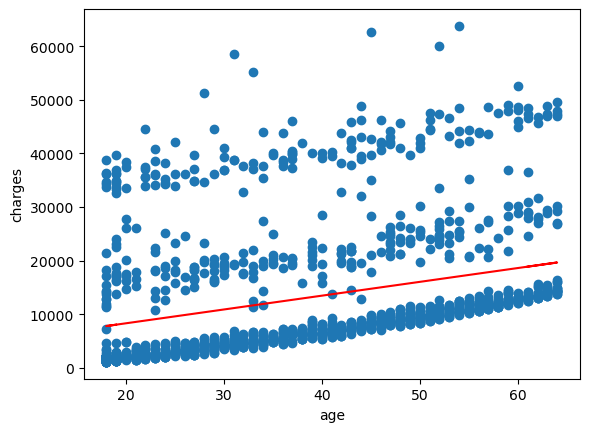

In [7]:
import matplotlib.pyplot as plt
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
#산점도 그리기
plt.scatter(X,y)
#회귀선 그리기
plt.plot(X, slope*X +intercept, c="red")
plt.xlabel("age")
plt.ylabel("charges")

In [8]:
from scipy import stats
#bmi와 보험료와의 관계
X=data2["bmi"].values
#종속변수
y=data2["charges"].values
result=stats.linregress(X, y)
result

LinregressResult(slope=393.87303079739524, intercept=1192.9372089611497, rvalue=0.1983409688336289, pvalue=2.459085535116683e-13, stderr=53.25073835210321, intercept_stderr=1664.8023845286948)

Text(0, 0.5, 'charges')

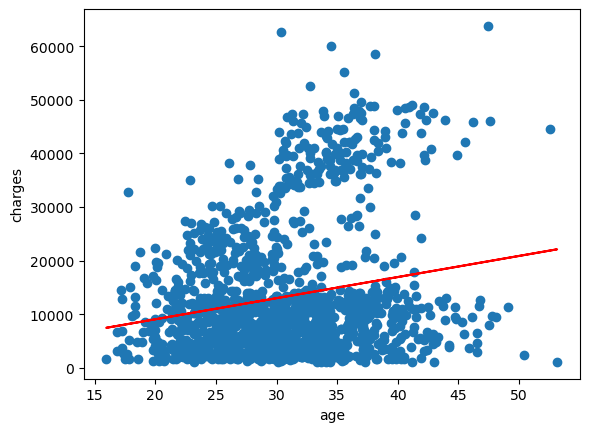

In [9]:
import matplotlib.pyplot as plt
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
#산점도 그리기
plt.scatter(X,y)
#회귀선 그리기
plt.plot(X, slope*X +intercept, c="red")
plt.xlabel("age")
plt.ylabel("charges")

In [10]:
from scipy import stats
#자녀수와 보험료와의 관계
X=data2["children"].values
#종속변수
y=data2["charges"].values
result=stats.linregress(X, y)
result

LinregressResult(slope=683.0893824813649, intercept=12522.495549644096, rvalue=0.06799822684790487, pvalue=0.012852128520136412, stderr=274.2018326126803, intercept_stderr=446.450065036325)

Text(0, 0.5, 'charges')

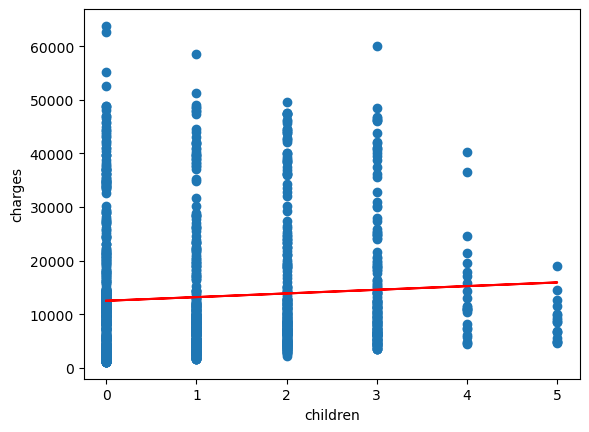

In [11]:
import matplotlib.pyplot as plt
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
#산점도 그리기
plt.scatter(X,y)
#회귀선 그리기
plt.plot(X, slope*X +intercept, c="red")
plt.xlabel("children")
plt.ylabel("charges")

In [12]:
# 다중 회귀분석
#명목형 변수는 제외하고 연속형 변수만 독립변수로 선택
#독립변수 : 연속형 변수만 사용하고 범주형 변수는 사용하지 않음
df2=data2.iloc[:,[0,2,3]]
print(df2.head())
#종속변수
y2=data2.iloc[:,[9]]
print(y2.head())

   age     bmi  children
0   19  27.900         0
1   18  33.770         1
2   28  33.000         3
3   33  22.705         0
4   32  28.880         0
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


In [13]:
import statsmodels.api as sm
model=sm.OLS(y2, df2)
result=model.fit()
print("회귀계수\n",result.params)
print("R-squared\n",result.rsquared) #회귀모델의 설명력 59.5%의 설명력
print("P values\n",result.pvalues)
#요약 결과 출력
print(result.summary())

회귀계수
 age         205.509604
bmi         162.508428
children    407.682683
dtype: float64
R-squared
 0.5957184482734048
P values
 age         1.202690e-22
bmi         8.153462e-09
children    1.133688e-01
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                   6.52e-262
Time:                        12:51:04   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                       

In [14]:
#유의하지 않은 children 변수 제거
df2=data2.iloc[:,[0,2]]
print(df2.head())
#종속변수
y2=data2.iloc[:,[9]]
print(y2.head())
model=sm.OLS(y2, df2)
result=model.fit()
print("회귀계수\n",result.params)
print("R-squared\n",result.rsquared)
print("P values\n",result.pvalues)
#요약 결과 출력
print(result.summary())

   age     bmi
0   19  27.900
1   18  33.770
2   28  33.000
3   33  22.705
4   32  28.880
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520
회귀계수
 age    208.863249
bmi    172.394322
dtype: float64
R-squared
 0.5949583640125078
P values
 age    1.634082e-23
bmi    3.773924e-10
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              981.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                   6.45e-263
Time:                        12:51:16   Log-Likelihood:                         -14401.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1336   BIC:        

In [16]:
X=data2[data2.columns[:-1]]
y=data2['charges']

In [17]:
X=X[['age', 'bmi', 'children', 'smoker', 'southwest', 'southeast',
       'northeast', 'northwest']]
model=sm.OLS(y,X) 
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:06:14   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.9736     11.891     21.610      0.000     233.646     280.301
bmi          338.6646     28.559     11.858      0.000     282.639     394.690
children     474.5665    137.740      3.445      0.001     204.355     744.778
smoker      2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
southwest  -1.295e+04   1012.403    -12.791      0.000   -1.49e+04    -1.1e+04
southeast  -1.302e+04   1071.021    -12.161      0.000   -1.51e+04   -1.09e+04
northeast  -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
northwest  -1.234e+04    979.405    -12.602      0.000   -1.43e+04   -1.04e+04
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""